# K-Nearest Neighbors Algorithm

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses the proximity of an individual data point to a group of data points to make classifications about the grouping of an individual data point.

In [32]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import precision_score, recall_score, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Dataset

Our dataset classifies water potability based on nine chemical measurables. All of these columns are numercial, while the potability is a categorical column.

In [2]:
# Load the dataframe
df = pd.read_csv('water_potability.csv')
print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Cleaning**

In [3]:
# Check for null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are some null values in the ph, Sulfate and Trihalomethanes columns. We check for mean and median to identify possible outliers in order to fill the NaN values reasonably. For a dataset of 3200 rows dropping ~1000 rows skews the data too.

In [4]:
# Display mean and median of column with missing values
print(f"Mean ph value = {df['ph'].mean()}")
print(f"Median ph value = {df['ph'].median()}")
print('\n')
print(f"Mean Sulfate value = {df['Sulfate'].mean()}")
print(f"Median Sulfate value = {df['Sulfate'].median()}")
print('\n')
print(f"Mean Trihalomethanes value = {df['Trihalomethanes'].mean()}")
print(f"Median Trihalomethanes value = {df['Trihalomethanes'].median()}")

Mean ph value = 7.080794504276835
Median ph value = 7.036752103833548


Mean Sulfate value = 333.7757766108135
Median Sulfate value = 333.073545745888


Mean Trihalomethanes value = 66.39629294676803
Median Trihalomethanes value = 66.62248509808484


We see that for each column mean and median are almost equal, so we can deduct that there are no extreme outliers and we can safely use the mean to fill ne missing values.

In [5]:
# Filling missing values with the column mean
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].infer_objects(copy=False)

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['ph'] = df['ph'].infer_objects(copy=False)

df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Sulfate'] = df['Sulfate'].infer_objects(copy=False)

In [6]:
# Check the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


As desired all columns are floats (numerical) except the potability column which has the datatype of integer for classification (equivalent to boolean).

0 = non-potable (False)

1 = potable (True)

**Exploratory Data Analysis**

In [7]:
# Plot pairwise relationships in a dataset
#sns.pairplot(df, hue="Potability");

The pairplots illustrate that there is no relationship between two columns that enables unambigious grouping. This is crucial for an accurate application of the knn algorithm.

# KNN Algorithm

m = number of features

For each test set data point we calculate the distance of this data point to all train set data points in the m-dimensional space. By setting n we define the n nearest neighbors of the test data point. The resulting class of the test data point is the class average of its n neighbors.

**Features and target**

In [8]:
# Define feature (chemical measurables) and target (potability classification) columns
features = df.drop(columns = ["Potability"])
target = df["Potability"]

**Train, test, and split groups**

In [9]:
# Set the size of the test group to 20% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [10]:
# Create an instance of the knn classifier without setting the number of nearest neighbors
knn = KNeighborsClassifier()

In [11]:
# Train the model with the training features and target
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Make a prediction for the water potability of the test group
y_pred = knn.predict(X_test)
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
y_test.values[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

## Evaluation Metrics

In [14]:
accuracy = knn.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
print(f'Accuracy = ', accuracy)
print(f"Precision = ", precision)
print(f"Recall = ", recall)

Accuracy =  0.5457317073170732
Precision =  0.36082474226804123
Recall =  0.28688524590163933


When comparing the predicted potability with the correct potability we see that many predictions are wrong. We calculate the accuracy, precision and recall and conduct that this algorithm is not appropiate for the experiment.

# Feature Engineering

**One hot encoding**

One hot encoding cannot be used here since there are only numerical features, no categorical ones.

# Feature Scaling

In [29]:
# We initialize the MinMayScaler instance.
normalizer = MinMaxScaler() 

# We fit our model to the feautures of the training set, while keeping in mind to only fit it to the training data in order to prevent data leakage.
normalizer.fit(X_train)

# We apply the normalizer function to the train and test feature data.
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

# We cast our normalized training and test data into a new dataframe and display.
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

# We initialize a new knn classifier instance without defining the hypterparameter yet.
knn_norm = KNeighborsClassifier(n_neighbors=10) #5.

# We train the algorithm with our normalized training data.
knn_norm.fit(X_train_norm, y_train) #6.

# We predict the class of our normalized test data.
y_pred_norm = knn_norm.predict(X_test_norm) #7.

## Evaluation Metrics

In [23]:
accuracy_norm = knn_norm.score(X_test_norm, y_test)
precision_norm = precision_score(y_test, y_pred_norm, average='binary')
recall_norm = recall_score(y_test, y_pred_norm, average='binary')
print(f'Accuracy = ', accuracy_norm)
print(f"Precision = ", precision_norm)
print(f"Recall = ", recall_norm)

Accuracy =  0.6371951219512195
Precision =  0.5306122448979592
Recall =  0.21311475409836064


In [24]:
print(f"Accuracy improvement = {(accuracy_norm - accuracy) / accuracy * 100}")
print(f"Precision improvement = {(precision_norm - precision) / precision * 100}")
print(f"Recall improvement = {(recall_norm - recall) / recall * 100}")

Accuracy improvement = 16.75977653631284
Precision improvement = 47.05539358600584
Recall improvement = -25.71428571428572


- The feauture scaling improved the accuracy by 16%, indicating less positve and negative falsity in the algorithm.
- The precision was significantly increased by 47%, indicating that the distinction between true positive and false positive observations was enhanced. Apparently less water samples are classified as potable while they are actually not, therefore boosting the safety of water consumption.
- The recall deteriorated by 25%, indicating that potable water is recognized less frequent, which will lead to more water wastage.

Overall the experiment seems to have been skewed in favor of the false negative classification by applying feature scaling.

# Feature Selection

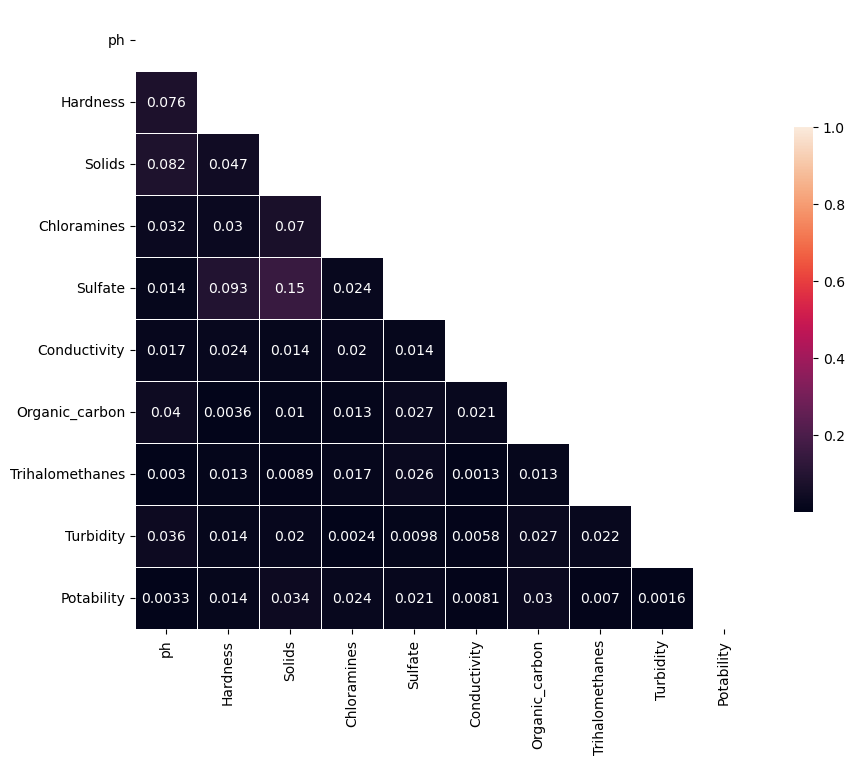

In [33]:
corr = np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

This correlation heatmap just confirms what we feared - the potability has almost no linear correlation with any of the columns.